- FIFA World Cup 2022 Player Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-player-data)

In [1]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Do not truncate tables
pd.set_option('display.max_columns', None)

In [2]:
df_player_possession    = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_possession.csv', delimiter=',')

In [4]:
team_counts = df_player_possession['team'].value_counts()

In [6]:
print(team_counts)

team
Brazil            26
Morocco           25
Argentina         24
Switzerland       24
France            24
Portugal          24
Saudi Arabia      23
Japan             22
Costa Rica        22
Cameroon          22
Serbia            22
Mexico            21
Poland            21
Netherlands       21
Croatia           21
Korea Republic    21
Spain             21
Tunisia           21
IR Iran           21
Denmark           20
Belgium           20
United States     20
Germany           20
Ghana             20
Senegal           20
Qatar             20
England           20
Australia         20
Canada            19
Uruguay           19
Wales             18
Ecuador           18
Name: count, dtype: int64


<Axes: xlabel='team'>

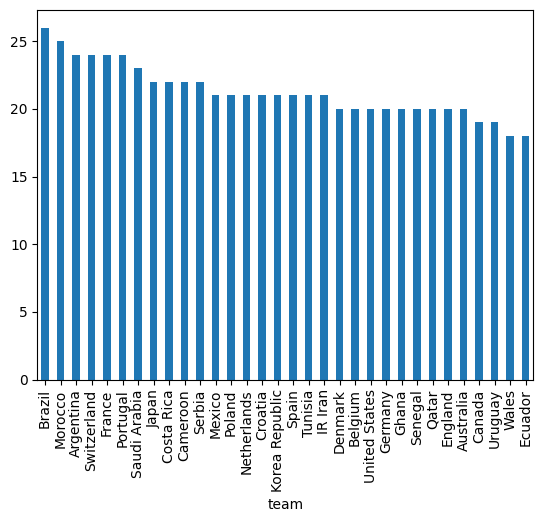

In [5]:
team_counts.plot(kind='bar')

In [8]:
france = df_player_possession[df_player_possession['team'].isin(['France'])]


In [10]:
argentina = df_player_possession[df_player_possession['team'].isin(['Argentina'])]

In [12]:
other = df_player_possession[~df_player_possession['team'].isin(['France','Argentina'])]